In [1]:
from occultence import *

(0.99, 1.015)

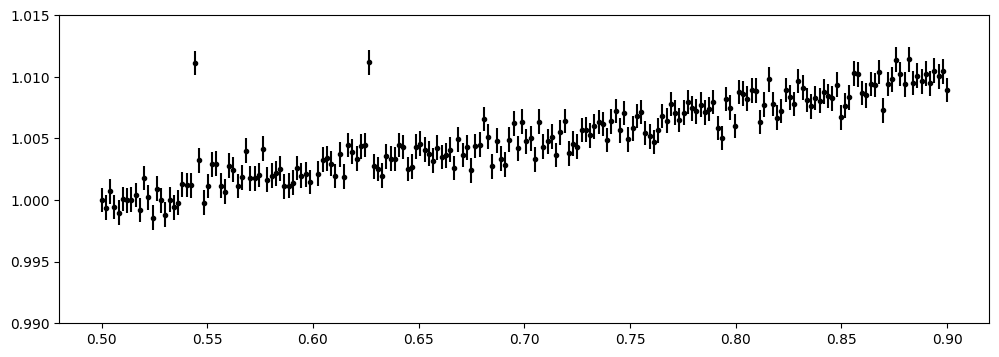

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

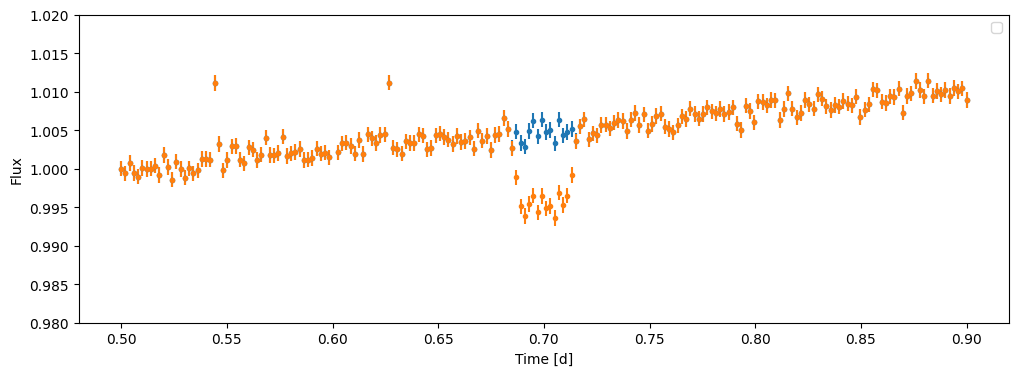

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'a': [<Quantity 5.71151244 solRad>],
  'a_Rs': [<Quantity 57.11512439>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [8]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.178717,0.674309,0.011702,2.553215,0.05479152629786699,0.017379,0.946829,1.4846578406971185 solRad,14.846578406971185,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,-0.040070,0.813130,0.010345,1.179756,0.011698297990024356,0.017263,1.241463,1.8367822150858715 solRad,18.367822150858714,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,-0.149344,0.317669,0.004916,1.919898,0.030980976168332806,0.017069,0.725232,1.5531316312071046 solRad,15.531316312071045,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,-0.095060,0.673187,0.009887,1.482944,0.018483674211089103,0.017036,1.040849,1.6880981719368202 solRad,16.8809817193682,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,-0.289405,0.157873,0.000914,0.791517,0.005265741967616908,0.014013,0.581078,1.252664029306381 solRad,12.52664029306381,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.208963,0.893555,0.001618,2.276353,0.04355298870741519,0.016795,1.052279,1.4173018087700566 solRad,14.173018087700566,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,-0.001882,0.263466,0.010621,0.595083,0.0029764190032719583,0.016836,0.762327,1.9476748962987749 solRad,19.47674896298775,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,-0.141008,0.834239,0.010570,2.391790,0.048082231541298266,0.017683,1.102952,1.5731347577295403 solRad,15.731347577295402,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,-0.224795,0.197940,0.006965,1.492693,0.018727496072256617,0.015552,0.617961,1.3832733530663317 solRad,13.832733530663315,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


In [46]:
results = targ.full_injection_recovery(nfake=100, pool=False, minimum_planet_radius=0.1 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                       minimum_period=0.5 * u.d, maximum_period=0.5 * u.d, recovery_kw = {'condition_on_epoch':1 * u.hour}, verbose=False)

/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be a

In [47]:
# results

In [48]:
results[4]

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.30103,0.914165,0.014699,0.710195,0.004239298685056956,0.013594,0.957083,1.2305080530542862 solRad,12.305080530542861,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
1,-0.30103,0.545852,0.022988,2.471801,0.0513529976829975,0.015466,0.772926,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.045151,0.02,0.773104,0.0,78.204329,test,0.1 solRad,0.1 solMass,None,None
2,-0.30103,0.501642,0.021801,2.484695,0.05189013785101525,0.015525,0.750821,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.057936,0.01,0.747704,0.0,81.933420,test,0.1 solRad,0.1 solMass,None,None
3,-0.30103,0.994649,0.001512,2.356453,0.04667198442937062,0.015752,0.997325,1.2305080530542862 solRad,12.305080530542861,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
4,-0.30103,0.300066,0.016592,2.689116,0.0607795888663158,0.015934,0.650033,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.067659,0.01,0.648704,0.0,95.684380,test,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.30103,0.320452,0.015690,0.823089,0.005694189383615954,0.013703,0.660226,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.006779,0.01,0.659104,0.0,9.586931,test,0.1 solRad,0.1 solMass,None,None
96,-0.30103,0.473985,0.003173,2.820874,0.06688148478518972,0.016300,0.736992,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.062501,0.02,0.736604,0.0,108.255238,test,0.1 solRad,0.1 solMass,None,None
97,-0.30103,0.141213,0.008937,2.402734,0.04852326026829035,0.015745,0.570607,1.2305080530542862 solRad,12.305080530542861,1.0,...,0.044941,0.02,0.569904,0.0,77.840828,test,0.1 solRad,0.1 solMass,None,None
98,-0.30103,0.734497,0.014445,0.378606,0.0012047955190089272,0.013201,0.867248,1.2305080530542862 solRad,12.305080530542861,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None


In [49]:
results[0][0].metadata

{'name': 'test_inject0',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.95708262 d>],
  'inc': [<Quantity 1.55609705 rad>],
  'rp': [<Quantity 0.71019513 earthRad>],
  'a': [<Quantity 1.23050805 solRad>],
  'a_Rs': [<Quantity 12.30508053>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.0042393>],
  'duration': [<Quantity 0.01359413 d>]},
 'thresholds': {}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


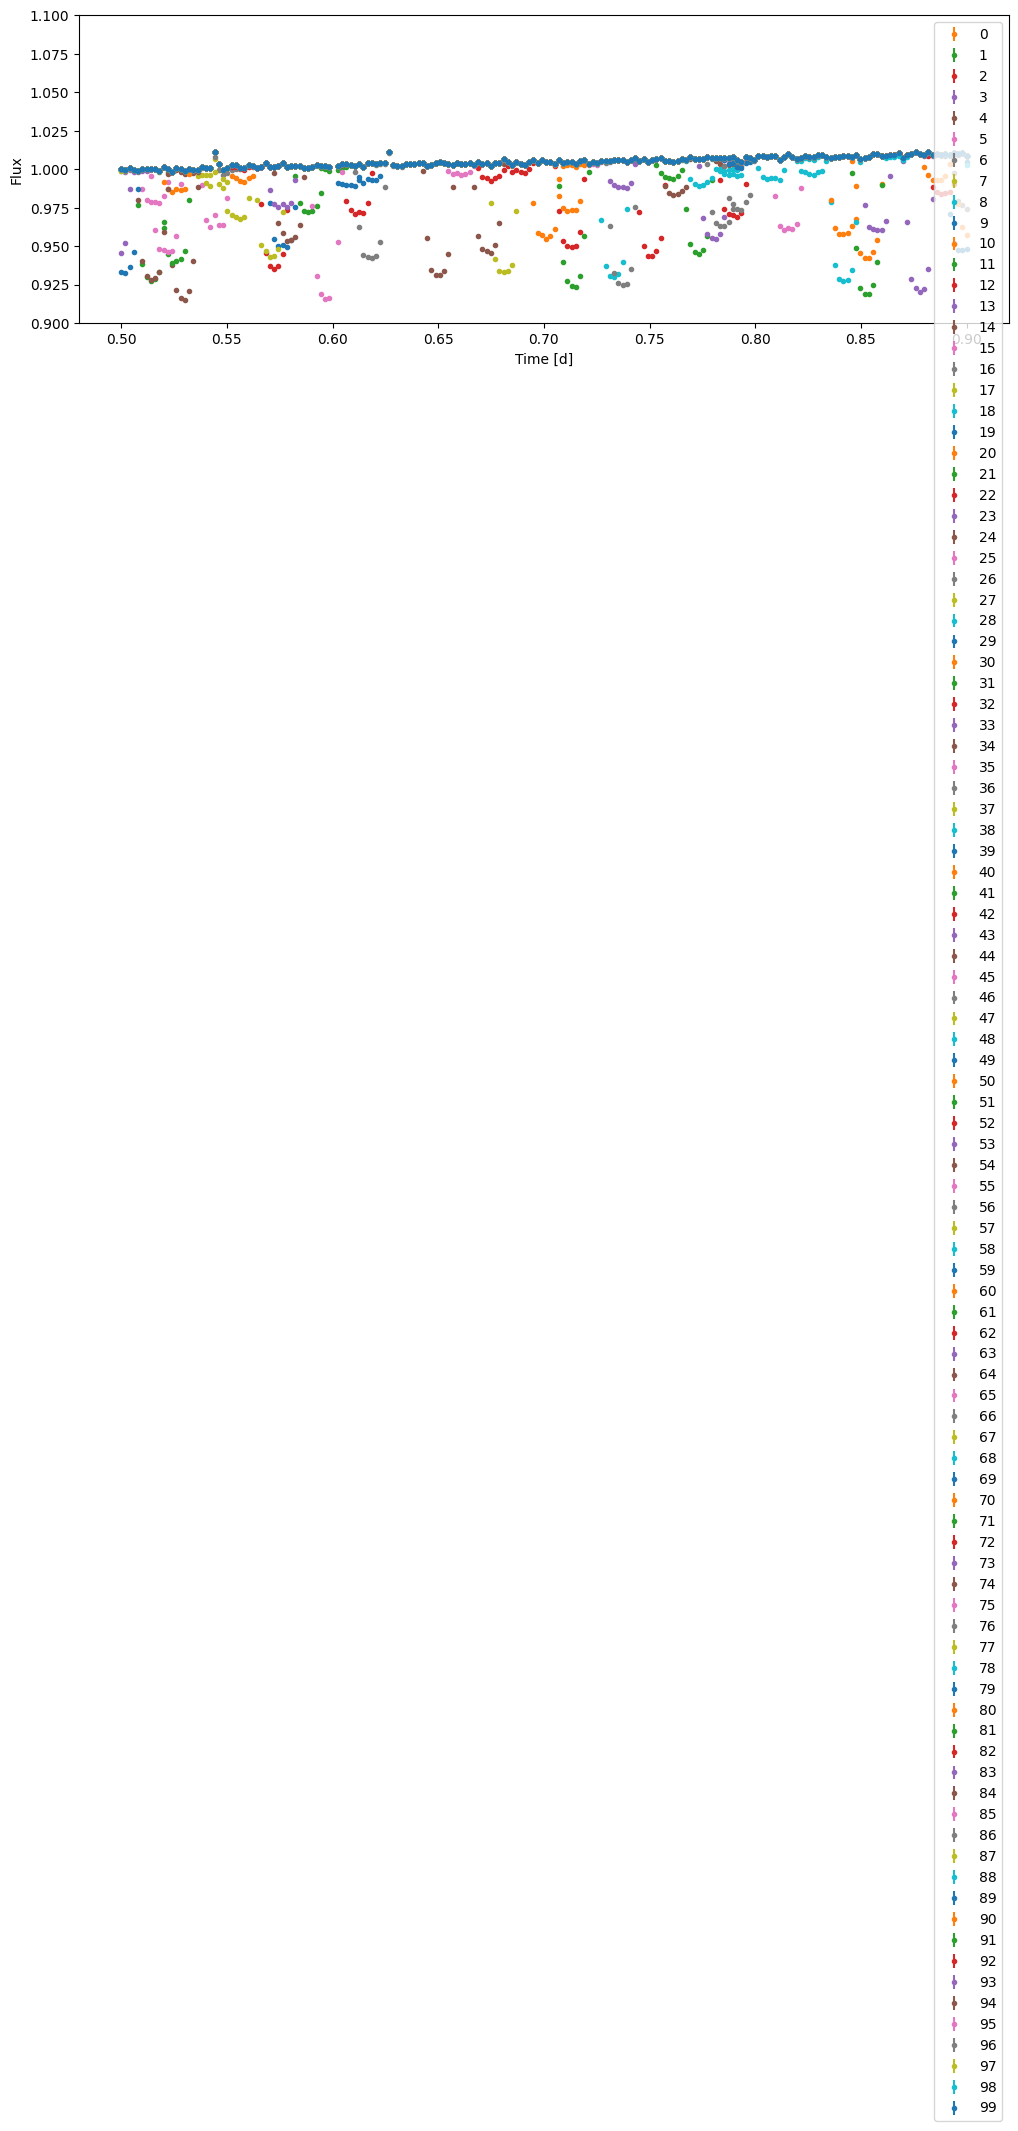

In [50]:
ax=targ.plot()
for i, lc in enumerate(results[0]):
    lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [51]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

In [52]:
results[3][1].metadata

{'name': 'test_inject1_clean_bin_bls',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 0.5 d>],
  'epoch': [<Quantity 0.77292618 d>],
  'inc': [<Quantity 1.54780656 rad>],
  'rp': [<Quantity 2.47180143 earthRad>],
  'a': [<Quantity 1.23050805 solRad>],
  'a_Rs': [<Quantity 12.30508053>],
  'ld': [[0.385, 0.304]],
  'depth': [<Quantity 0.051353>],
  'duration': [<Quantity 0.0154659 d>]},
 'thresholds': {},
 'BLS_transits_found': True,
 'BLS_transits_ind': array([51, 52, 53]),
 'BLS_transits_params': {'period': [<Quantity 0.5 d>],
  'depth': [0.045151290299237146],
  'duration': [<Quantity 0.02 d>],
  'epoch': [<Time object: scale='tdb' format='jd' value=0.7731041666666667>],
  'epoch_start': [<Time object: scale='tdb' format='jd' value=0.7631041666666667>],
  'epoch_end': [<Time object: scale='tdb' format='jd' value=0.7831041666666667>],
  'snr': [78.2043288255705]}}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


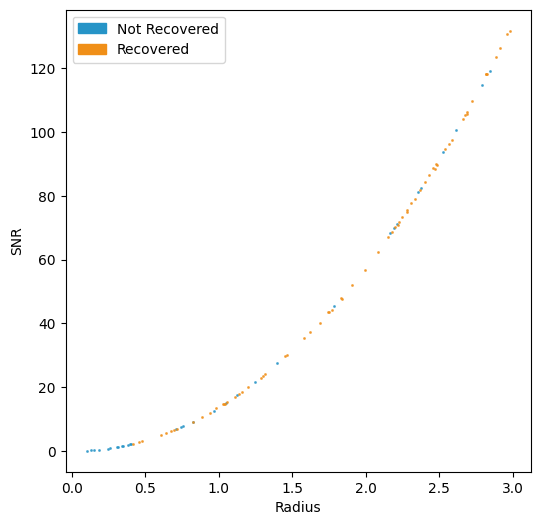

In [53]:
n_points_in_transit = results[4]['duration']/(7.5/(24*60))
lc_noise = 1e-3

plot_transitparams(results[4]['r_p'], results[4]['depth'] * np.sqrt(n_points_in_transit)/lc_noise, results[4]['recovered'], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
                       xscale='uniform', add_points={}, svname="")

In [54]:
results[4]['snr']

0       0.000000
1      78.204329
2      81.933420
3       0.000000
4      95.684380
         ...    
95      9.586931
96    108.255238
97     77.840828
98      0.000000
99      0.000000
Name: snr, Length: 100, dtype: float64